In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_cc = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_cc.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_cc.index.values)
ID_Default = np.intersect1d(ID_Default, pa_cc.index.values)

In [7]:
payback = pa_cc.loc[ID_Payback]
default = pa_cc.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_GOODS_PRICE"]

In [9]:
pa_cc.head()

,PA_CNT_CREDITS,PA_CC_BALANCE_30,PA_CC_PAYMENT_30,PA_CC_DPD_30,PA_CC_BALANCE_60,PA_CC_PAYMENT_60,PA_CC_DPD_60,PA_CC_BALANCE_90,PA_CC_PAYMENT_90,PA_CC_DPD_90,PA_CC_BALANCE_120,PA_CC_PAYMENT_120,PA_CC_DPD_120,PA_CC_BALANCE_150,PA_CC_PAYMENT_150,PA_CC_DPD_150,PA_CC_BALANCE_180,PA_CC_PAYMENT_180,PA_CC_DPD_180,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_GOODS_PRICE,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
394447,1,-1.206367,-1.389108,0.0,1.434002,1.008387,0.0,0.992963,-0.429381,0.0,-0.349513,-0.292196,0.0,-0.415697,-0.215746,0.0,-0.455389,1.318045,0.0,2250.0,45000.0,45000.0,45000.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
361282,1,0.946004,0.850318,0.0,0.828945,1.109609,0.0,0.861611,0.179508,0.0,-0.393110,-1.267179,0.0,-1.074370,0.280581,0.0,-1.169080,-1.152838,0.0,2250.0,45000.0,45000.0,45000.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
436351,1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2250.0,45000.0,45000.0,45000.0,1.0,3.0,3.0,0.0,1.0,1.0,1.0,2.0,6.0,1.0,3.0,0.0
181153,1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2250.0,45000.0,45000.0,45000.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0
309691,1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2250.0,45000.0,45000.0,45000.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### PA_AMT_ANNUITY

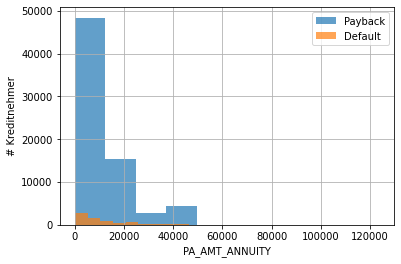

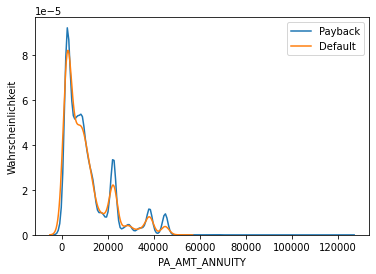

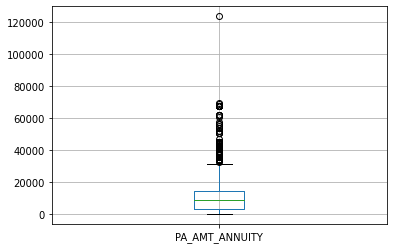

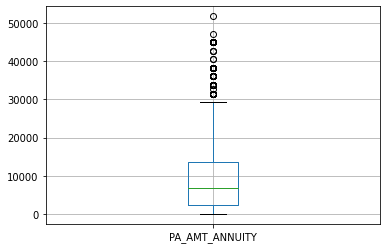

### PA_AMT_APPLICATION

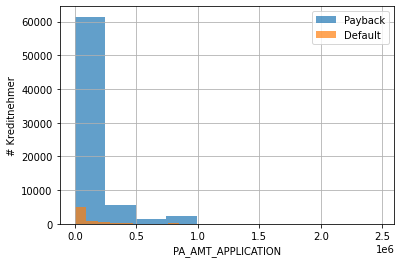

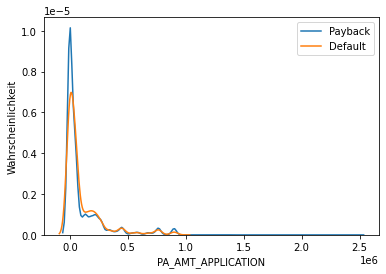

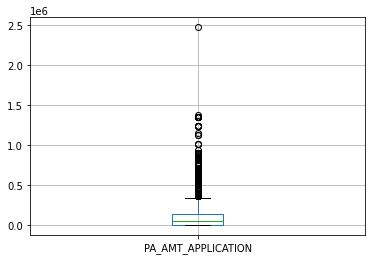

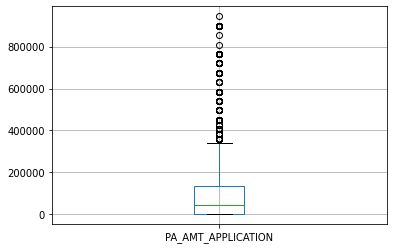

### PA_AMT_CREDIT

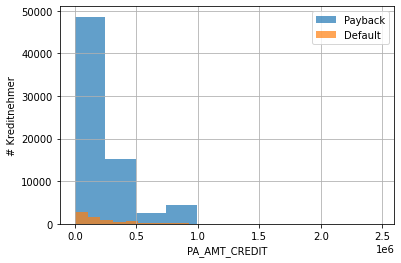

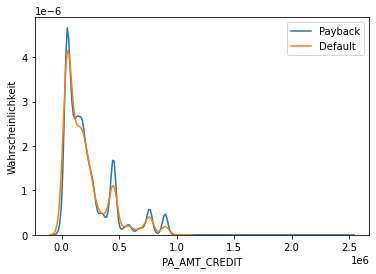

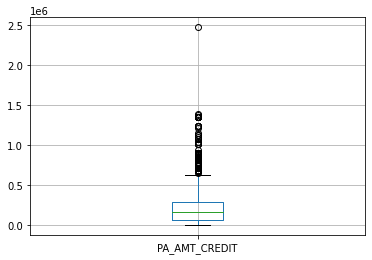

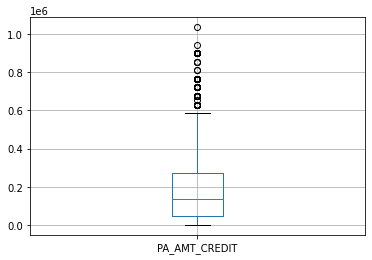

### PA_AMT_GOODS_PRICE

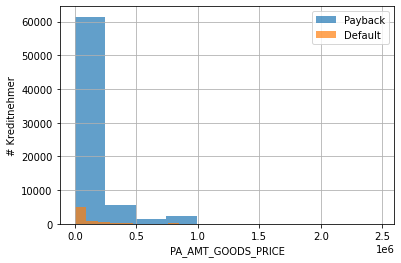

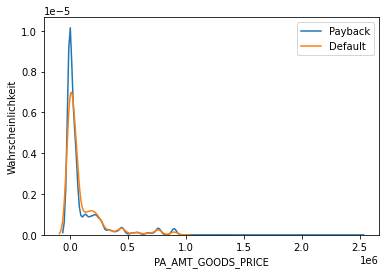

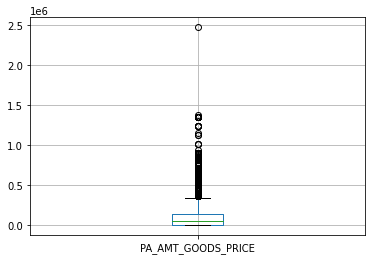

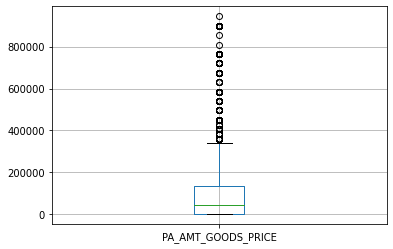

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_GOODS_PRICE"]

In [12]:
pa_cc[todo].head()

,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_GOODS_PRICE
SK_ID_CURR,,,,
394447,2250.0,45000.0,45000.0,45000.0
361282,2250.0,45000.0,45000.0,45000.0
436351,2250.0,45000.0,45000.0,45000.0
181153,2250.0,45000.0,45000.0,45000.0
309691,2250.0,45000.0,45000.0,45000.0


PA_AMT_ANNUITY

In [13]:
head = "PA_AMT_ANNUITY"

In [14]:
print(pa_cc[head].quantile(1))
print(pa_cc[head].quantile(0.99))
print(pa_cc[head].quantile(0.95))

123750.0
45000.0
38250.0


In [15]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [16]:
pa_cc.loc[ID_DROP, head] = np.nan

PA_AMT_APPLICATION

In [17]:
head = "PA_AMT_APPLICATION"

In [18]:
print(pa_cc[head].quantile(1))
print(pa_cc[head].quantile(0.99))
print(pa_cc[head].quantile(0.95))

2475000.0
900000.0
540000.0


In [19]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [20]:
pa_cc.loc[ID_DROP, head] = np.nan

PA_AMT_CREDIT

In [21]:
head = "PA_AMT_CREDIT"

In [22]:
print(pa_cc[head].quantile(1))
print(pa_cc[head].quantile(0.99))
print(pa_cc[head].quantile(0.95))

2475000.0
900000.0
765000.0


In [23]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [24]:
pa_cc.loc[ID_DROP, head] = np.nan

PA_AMT_GOODS_PRICE

In [25]:
head = "PA_AMT_GOODS_PRICE"

In [26]:
print(pa_cc[head].quantile(1))
print(pa_cc[head].quantile(0.99))
print(pa_cc[head].quantile(0.95))

2475000.0
900000.0
540000.0


In [27]:
ID_DROP = pa_cc[pa_cc[head] > pa_cc[head].quantile(0.99)].index.values

In [28]:
pa_cc.loc[ID_DROP, head] = np.nan

## Plot Ergebnisse

### PA_AMT_ANNUITY

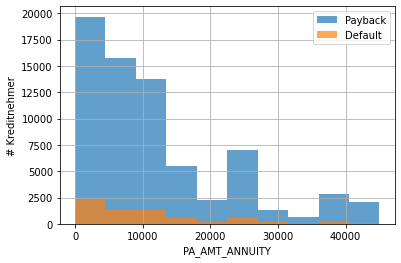

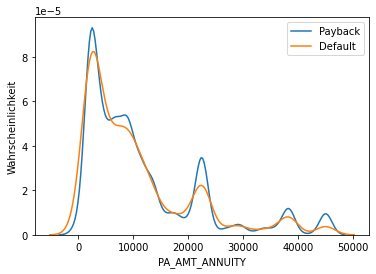

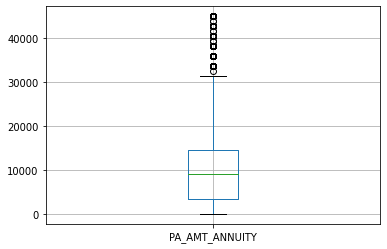

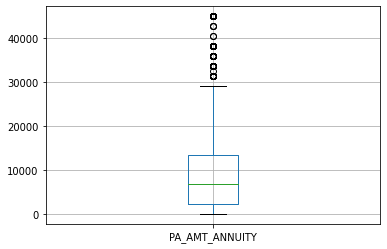

### PA_AMT_APPLICATION

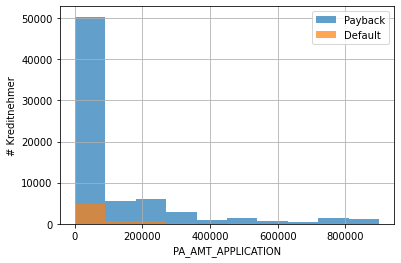

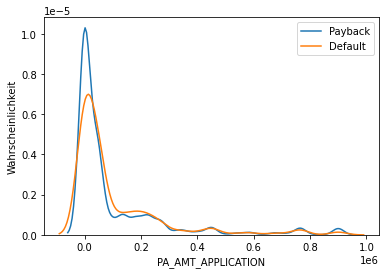

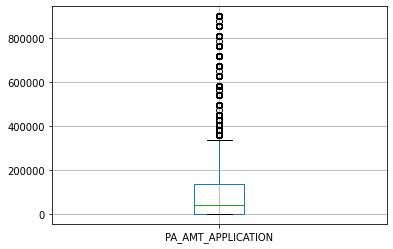

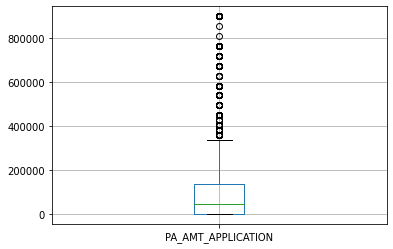

### PA_AMT_CREDIT

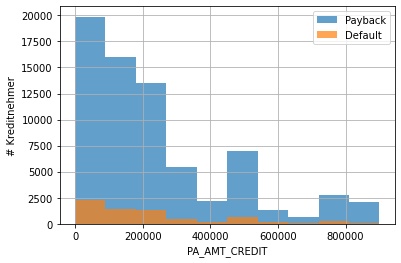

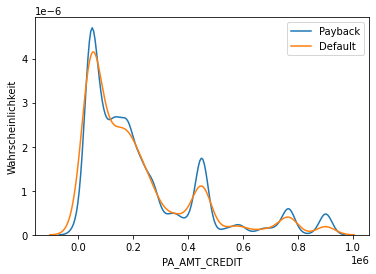

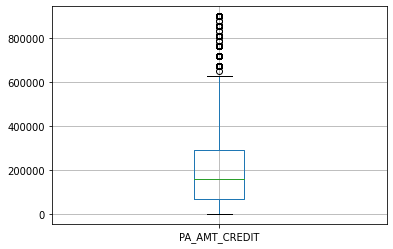

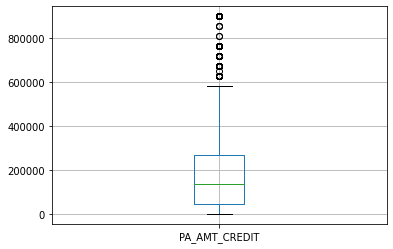

### PA_AMT_GOODS_PRICE

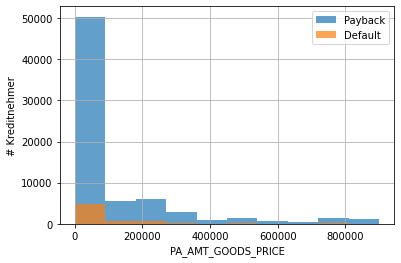

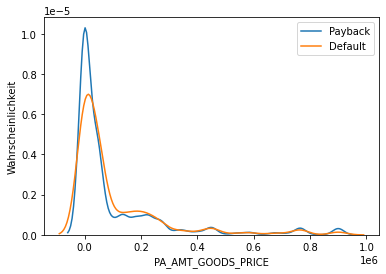

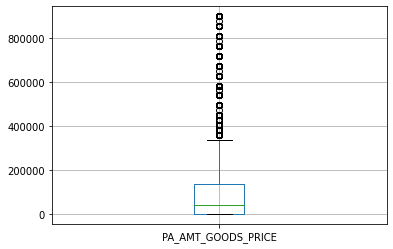

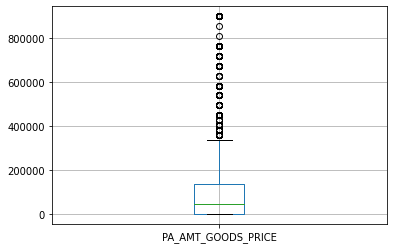

In [29]:
for head in todo:

    display(Markdown("### {head}".format(head=head)))

    payback = pa_cc.loc[ID_Payback]
    default = pa_cc.loc[ID_Default]

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()

    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()


In [30]:
pa_cc.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_cc.csv")